## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [ ]:
#[224,224] ##RGB-REd,Green,Blueb

In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Neetu\AppData\Local\Temp\ipykernel_10548\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 23s 13s/step - loss: 7.7852 - accuracy: 0.3281 - val_loss: 8.1829 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 18s 13s/step - loss: 5.7994 - accuracy: 0.3750 - val_loss: 2.6659 - val_accuracy: 0.2586
Epoch 3/50
2/2 [==============================] - 16s 11s/step - loss: 3.1706 - accuracy: 0.3281 - val_loss: 1.8663 - val_accuracy: 0.2586
Epoch 4/50
2/2 [==============================] - 13s 9s/step - loss: 1.4137 - accuracy: 0.4844 - val_loss: 2.1949 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 14s 10s/step - loss: 2.2822 - accuracy: 0.4375 - val_loss: 1.2318 - val_accuracy: 0.5862
Epoch 6/50
2/2 [==============================] - 14s 10s/step - loss: 0.9431 - accuracy: 0.5625 - val_loss: 2.2410 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 13s 9s/step - loss: 1.2999 - accuracy: 0.4375 - val_loss: 0.9721 - val_accuracy: 0.6034
Epoch 8/50
2/2 [=============

In [ ]:
r.history

{'loss': [7.785223960876465,
  5.799423694610596,
  3.1705679893493652,
  1.4137351512908936,
  2.282167673110962,
  0.9431177973747253,
  1.299850583076477,
  0.9972182512283325,
  0.8100886940956116,
  0.7383615970611572,
  0.6855025291442871,
  0.7596451044082642,
  0.5314879417419434,
  0.7204139232635498,
  0.5809868574142456,
  0.5940048098564148,
  0.5246521830558777,
  0.4265151023864746,
  0.6346864104270935,
  0.4122438430786133,
  0.550825834274292,
  0.36711806058883667,
  0.4431236982345581,
  0.4168504774570465,
  0.31297728419303894,
  0.3866208493709564,
  0.3600478172302246,
  0.3927123546600342,
  0.3405538499355316,
  0.33415594696998596,
  0.3050220310688019,
  0.28709933161735535,
  0.2701241374015808,
  0.3164215385913849,
  0.2935289144515991,
  0.28944337368011475,
  0.3399604558944702,
  0.297253280878067,
  0.2414461374282837,
  0.25968295335769653,
  0.2535039782524109,
  0.22496850788593292,
  0.30214667320251465,
  0.23892569541931152,
  0.26767146587371826

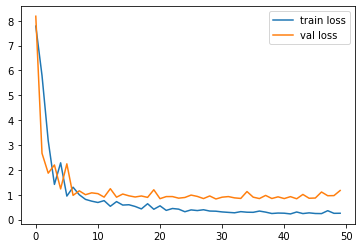

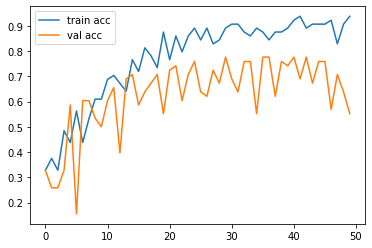

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


2/2 [==============================] - 8s 3s/step


In [ ]:
y_pred

array([[8.37326297e-06, 2.78820116e-05, 9.99963760e-01],
       [8.26693177e-01, 4.10616361e-02, 1.32245108e-01],
       [6.20824145e-03, 9.34045970e-01, 5.97457699e-02],
       [2.14837596e-01, 1.24277979e-01, 6.60884440e-01],
       [2.61112005e-02, 6.73746765e-01, 3.00142080e-01],
       [6.48545399e-02, 3.77439231e-01, 5.57706237e-01],
       [1.29443090e-02, 6.98374391e-01, 2.88681298e-01],
       [3.44606698e-01, 7.50274211e-03, 6.47890508e-01],
       [4.76122424e-02, 3.38542432e-01, 6.13845289e-01],
       [1.97032783e-02, 1.05122663e-01, 8.75174046e-01],
       [5.76223694e-02, 1.18533485e-02, 9.30524230e-01],
       [1.80520579e-01, 2.71398634e-01, 5.48080802e-01],
       [2.42442861e-02, 1.97074011e-01, 7.78681695e-01],
       [2.41847467e-02, 9.68744218e-01, 7.07108434e-03],
       [2.10283846e-02, 8.86493802e-01, 9.24778581e-02],
       [1.44562488e-02, 3.72546114e-04, 9.85171258e-01],
       [9.77185206e-04, 9.56496596e-01, 4.25262861e-02],
       [2.94129015e-03, 4.81761

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0,
       0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
#img_data

In [ ]:
img=image.load_img('Datasets/Test/audi/29.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[ 64.,  64.,  72.],
        [ 36.,  36.,  44.],
        [ 39.,  39.,  47.],
        ...,
        [200., 206., 220.],
        [200., 206., 220.],
        [200., 206., 220.]],

       [[121., 121., 129.],
        [ 89.,  89.,  97.],
        [ 74.,  74.,  82.],
        ...,
        [199., 205., 219.],
        [199., 205., 219.],
        [199., 205., 219.]],

       [[121., 121., 129.],
        [ 89.,  89.,  97.],
        [ 74.,  74.,  82.],
        ...,
        [199., 205., 219.],
        [199., 205., 219.],
        [199., 205., 219.]],

       ...,

       [[167., 170., 175.],
        [164., 167., 172.],
        [163., 166., 171.],
        ...,
        [163., 166., 171.],
        [163., 166., 171.],
        [162., 165., 170.]],

       [[167., 170., 175.],
        [164., 167., 172.],
        [163., 166., 171.],
        ...,
        [163., 166., 171.],
        [163., 166., 171.],
        [162., 165., 170.]],

       [[170., 173., 178.],
        [168., 171., 176.],
        [166., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255
x

array([[[0.2509804 , 0.2509804 , 0.28235295],
        [0.14117648, 0.14117648, 0.17254902],
        [0.15294118, 0.15294118, 0.18431373],
        ...,
        [0.78431374, 0.80784315, 0.8627451 ],
        [0.78431374, 0.80784315, 0.8627451 ],
        [0.78431374, 0.80784315, 0.8627451 ]],

       [[0.4745098 , 0.4745098 , 0.5058824 ],
        [0.34901962, 0.34901962, 0.38039216],
        [0.2901961 , 0.2901961 , 0.32156864],
        ...,
        [0.78039217, 0.8039216 , 0.85882354],
        [0.78039217, 0.8039216 , 0.85882354],
        [0.78039217, 0.8039216 , 0.85882354]],

       [[0.4745098 , 0.4745098 , 0.5058824 ],
        [0.34901962, 0.34901962, 0.38039216],
        [0.2901961 , 0.2901961 , 0.32156864],
        ...,
        [0.78039217, 0.8039216 , 0.85882354],
        [0.78039217, 0.8039216 , 0.85882354],
        [0.78039217, 0.8039216 , 0.85882354]],

       ...,

       [[0.654902  , 0.6666667 , 0.6862745 ],
        [0.6431373 , 0.654902  , 0.6745098 ],
        [0.6392157 , 0

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.13519105, 0.00851937, 0.85628957]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 188ms/step


array([2], dtype=int64)

In [ ]:
#a==1

array([False])